In [ ]:
%matplotlib inline

In [ ]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sn
from sklearn.decomposition import PCA
#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from numpy import asarray
from numpy import save
from numpy import load

In [ ]:
fichier="/content/drive/MyDrive/projet_long/data_all.csv"
df = pd.read_csv(fichier,sep=";")
df.head()

,combined_station,total_chla_5.0,total_chla_8.35,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,total_chla_300.0,...,PAR,ZEU,ZHL,sin_day,cos_day,sin_long,cos_long,day,month,year
0,combined_station_100,NaN,0.113,NaN,NaN,0.108,0.1295,0.32933,0.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,combined_station_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.32148,NaN,NaN,-0.97212,-0.23449,0.98875,-0.14961,16.0,9.0,2000.0
2,combined_station_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.43553,NaN,NaN,-0.97212,-0.23449,0.98864,-0.15033,16.0,9.0,2000.0
3,combined_station_1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.56842,NaN,NaN,-0.94836,-0.31719,0.98853,-0.15105,11.0,9.0,2000.0
4,combined_station_1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.17873,NaN,NaN,-0.96794,-0.25119,0.98831,-0.15249,15.0,9.0,2000.0


In [ ]:
len(df)

3903

##Se débarrasser des doublons

In [ ]:
#on trouve les observations doublons (même date et meme localisation), on moyenne les observations d'un même doublon et on remplace les 2 doublons par cette moyenne
L=[]
col=df.columns
for i in range(len(df)):
  for j in range(i+1,len(df)):
    if df.iloc[i,72]==df.iloc[j,72] and df.iloc[i,73]==df.iloc[j,73] and df.iloc[i,74]==df.iloc[j,74]:
      if df.iloc[i,55]==df.iloc[j,55] and df.iloc[i,56]==df.iloc[j,56]:
        print((i,j))
        L.append(j)
        for k in range(len(col)):
          if type(df.iloc[i,k])==np.float64 or pd.isna(df.iloc[i,k]):
            df.iloc[i,k]=np.nanmean(np.array([df.iloc[i,k],df.iloc[j,k]])) 
df=df.drop(df.index[L])
df=df.reset_index()

In [ ]:
len(df)

3903

In [ ]:
df=df.drop(columns='index')

In [ ]:
df

,combined_station,total_chla_5.0,total_chla_8.35,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,total_chla_300.0,...,PAR,ZEU,ZHL,sin_day,cos_day,sin_long,cos_long,day,month,year
0,combined_station_100,NaN,0.113,NaN,NaN,0.108,0.1295,0.32933,0.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,combined_station_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.32148,NaN,NaN,-0.97212,-0.23449,0.98875,-0.14961,16.0,9.0,2000.0
2,combined_station_1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.43553,NaN,NaN,-0.97212,-0.23449,0.98864,-0.15033,16.0,9.0,2000.0
3,combined_station_1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.56842,NaN,NaN,-0.94836,-0.31719,0.98853,-0.15105,11.0,9.0,2000.0
4,combined_station_1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.17873,NaN,NaN,-0.96794,-0.25119,0.98831,-0.15249,15.0,9.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,combined_station_995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.46611,NaN,NaN,-0.94836,-0.31719,0.99022,-0.13954,11.0,9.0,2000.0
3899,combined_station_996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.53298,NaN,NaN,-0.94836,-0.31719,0.99012,-0.14026,11.0,9.0,2000.0
3900,combined_station_997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.79577,NaN,NaN,-0.97212,-0.23449,0.98928,-0.14601,16.0,9.0,2000.0
3901,combined_station_998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.20279,NaN,NaN,-0.97212,-0.23449,0.98928,-0.14601,16.0,9.0,2000.0


##Utiliser les corrélations entre les profondeurs 3,0 5,0 et 8,35 m pour compléter les valeurs manquantes. 

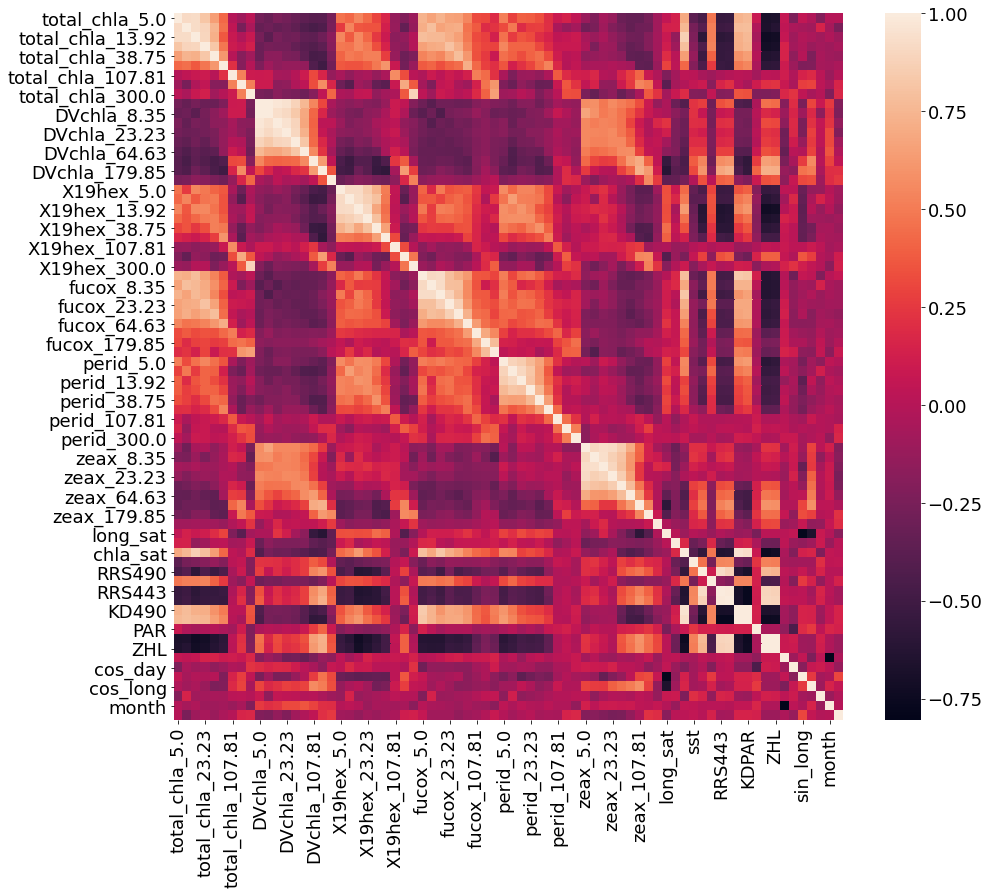

In [ ]:
fig=plt.figure(figsize=(15,13))
corr=df.corr()
sn.heatmap(corr, annot=False)
plt.show()

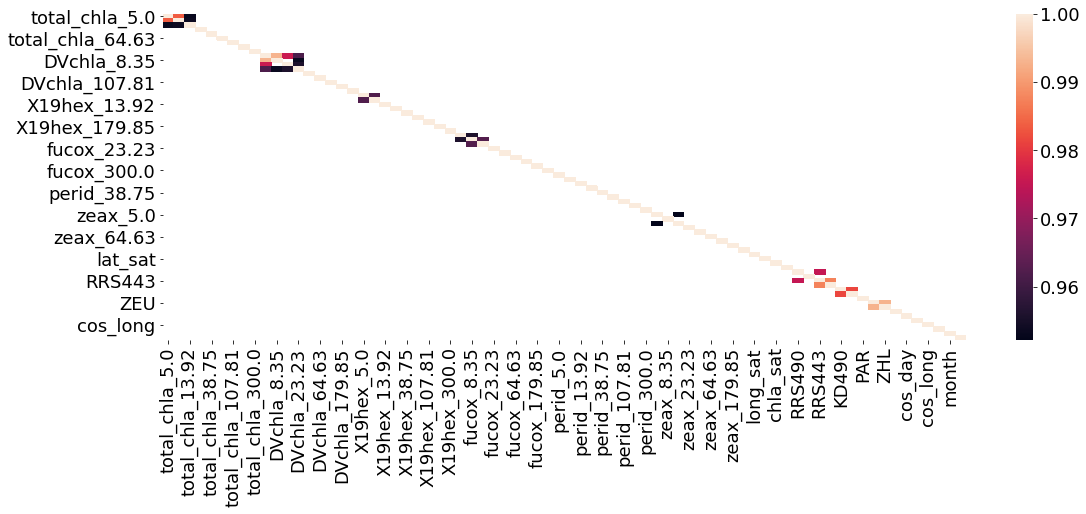

In [ ]:
grosses_corr=corr.where(abs(corr)>0.95)
sn.heatmap(grosses_corr, annot=False)

fortes corrélations entre les mesures à 3.0 5.0 et 8.35 m

In [ ]:
#calcule la distance moyenne entre les observations de 2 vecteurs si aucune des 2 n'est un nan 
def mean_distance(V1,V2):
  n=len(V1)
  s=0
  d=0
  for i in range(n):
    if np.isnan(V1[i])==False and np.isnan(V2[i])==False:
      d+=abs(V1[i]-V2[i])
      s+=1
  return (d/s)

In [ ]:
mean_distance(df['total_chla_13.92'],df['total_chla_8.35'])/np.nanmean(np.array(df[['total_chla_3.0','total_chla_5.0','total_chla_8.35','total_chla_13.92', 'total_chla_23.23','total_chla_38.75', 'total_chla_64.63', 'total_chla_107.81','total_chla_179.85', 'total_chla_300.0']]))

0.0990305507694479

In [ ]:
data_total_chla=df[['total_chla_5.0','total_chla_8.35', 'total_chla_13.92', 'total_chla_23.23', 'total_chla_38.75','total_chla_64.63', 'total_chla_107.81', 'total_chla_179.85', 'total_chla_300.0']]

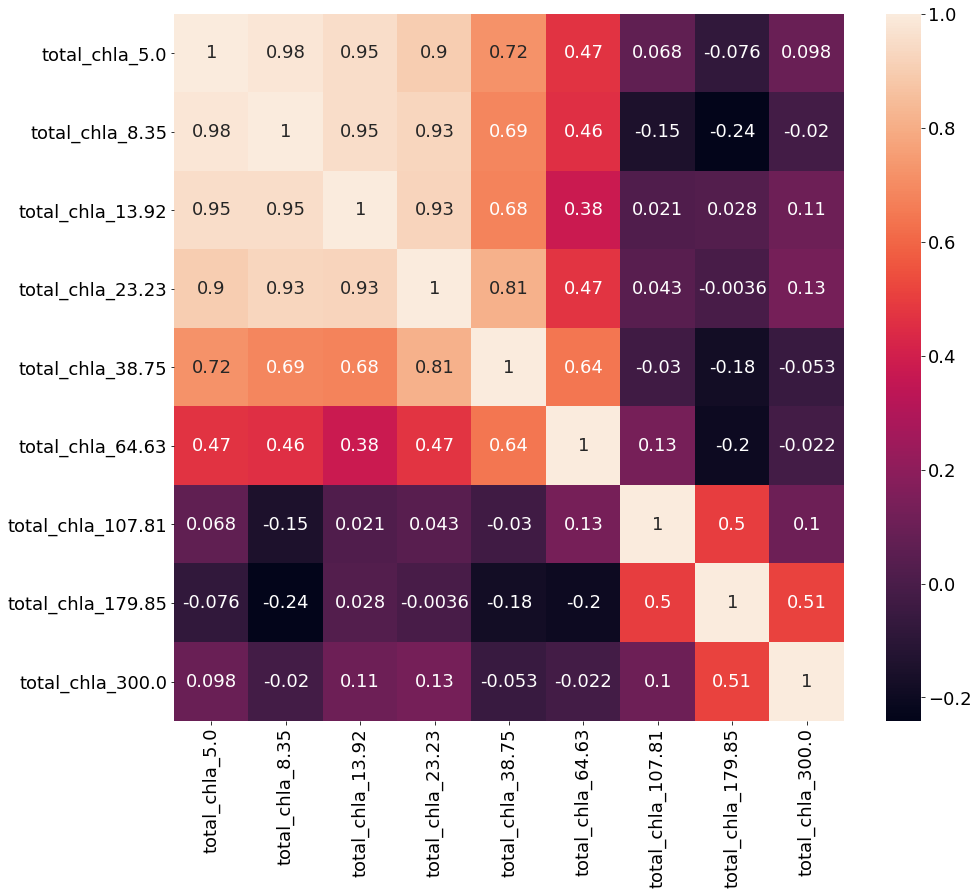

In [ ]:
fig=plt.figure(figsize=(15,13))
corr_data_total_chla=data_total_chla.corr()
sn.heatmap(corr_data_total_chla, annot=True)
plt.show()

In [ ]:
data_DVchla=df[['DVchla_5.0','DVchla_8.35', 'DVchla_13.92', 'DVchla_23.23', 'DVchla_38.75','DVchla_64.63', 'DVchla_107.81', 'DVchla_179.85', 'DVchla_300.0']]

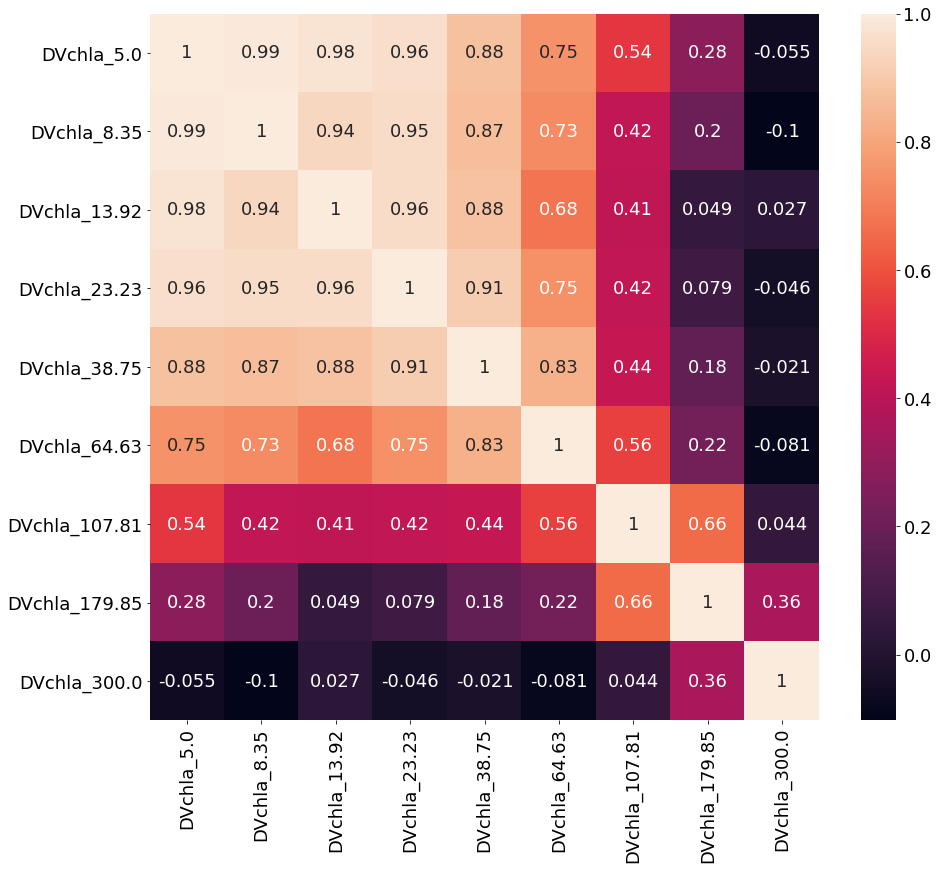

In [ ]:
fig=plt.figure(figsize=(15,13))
corr_data_DVchla=data_DVchla.corr()
sn.heatmap(corr_data_DVchla, annot=True)
plt.show()

In [ ]:
data_X19hex=df[['X19hex_5.0', 'X19hex_8.35', 'X19hex_13.92','X19hex_23.23', 'X19hex_38.75', 'X19hex_64.63', 'X19hex_107.81','X19hex_179.85', 'X19hex_300.0']]

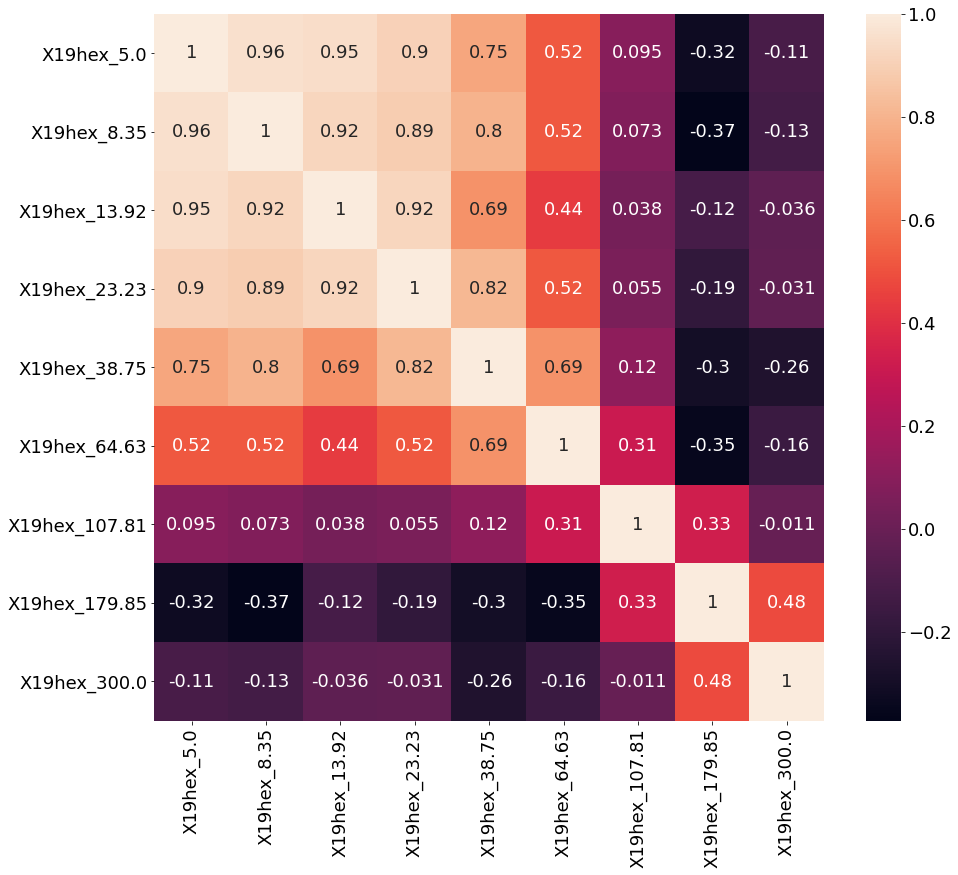

In [ ]:
fig=plt.figure(figsize=(15,13))
corr_data_X19hex=data_X19hex.corr()
sn.heatmap(corr_data_X19hex, annot=True)
plt.show()

In [ ]:
data_fucox=df[['fucox_5.0', 'fucox_8.35','fucox_13.92', 'fucox_23.23', 'fucox_38.75', 'fucox_64.63','fucox_107.81', 'fucox_179.85', 'fucox_300.0']]

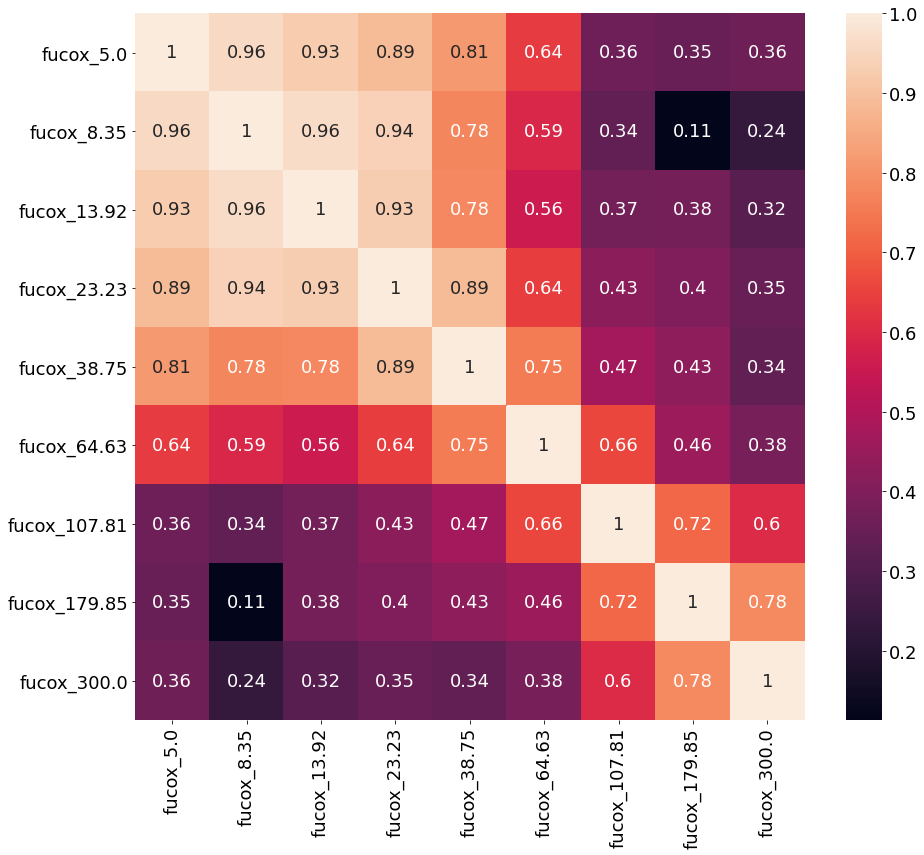

In [ ]:
fig=plt.figure(figsize=(15,13))
corr_data_fucox=data_fucox.corr()
sn.heatmap(corr_data_fucox, annot=True)
plt.show()

In [ ]:
data_perid=df[['perid_5.0','perid_8.35', 'perid_13.92', 'perid_23.23', 'perid_38.75','perid_64.63', 'perid_107.81', 'perid_179.85', 'perid_300.0']]

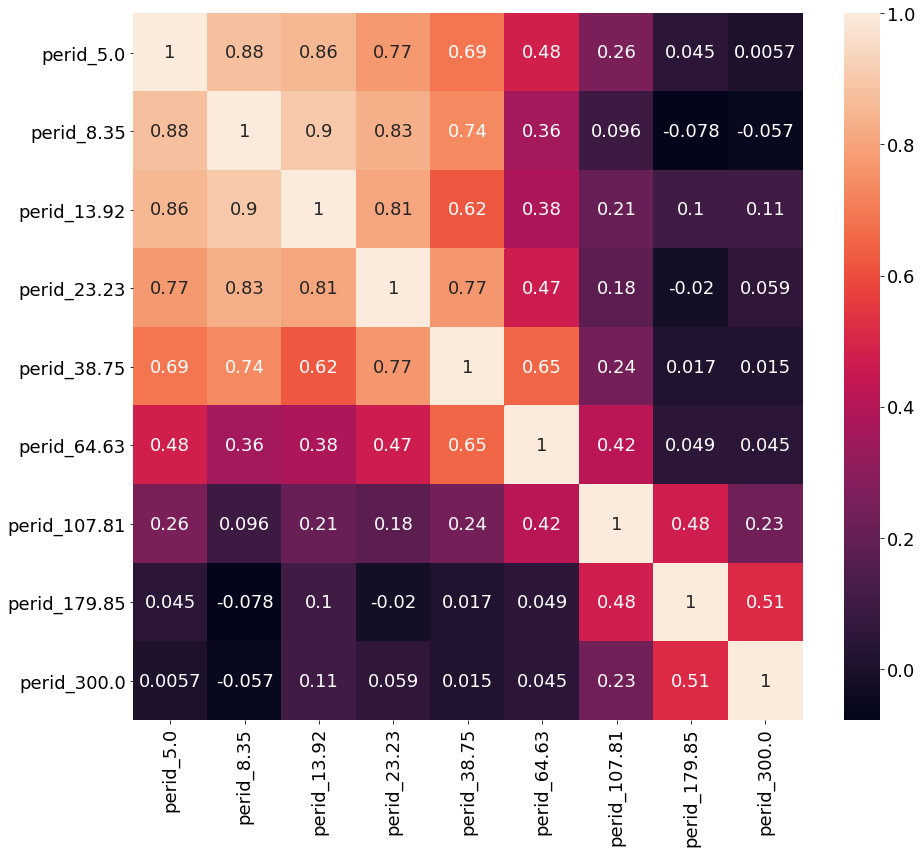

In [ ]:
fig=plt.figure(figsize=(15,13))
corr_data_perid=data_perid.corr()
sn.heatmap(corr_data_perid, annot=True)
plt.show()

In [ ]:
data_zeax=df[['zeax_5.0', 'zeax_8.35', 'zeax_13.92', 'zeax_23.23','zeax_38.75', 'zeax_64.63', 'zeax_107.81', 'zeax_179.85', 'zeax_300.0']]

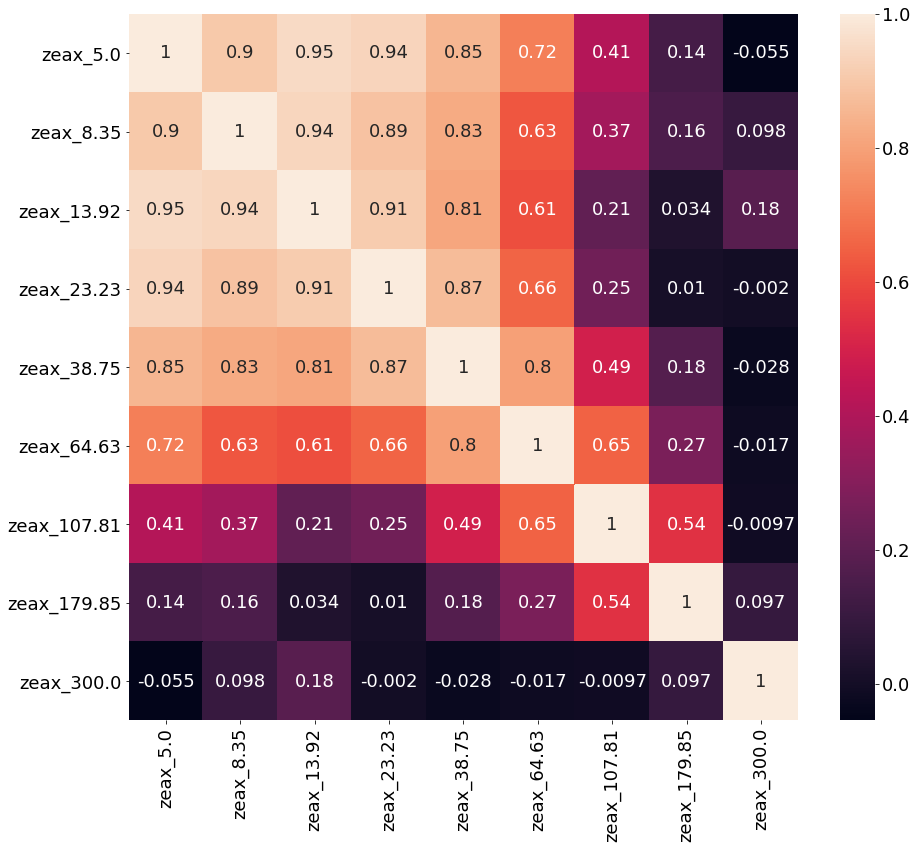

In [ ]:
fig=plt.figure(figsize=(15,13))
corr_data_zeax=data_zeax.corr()
sn.heatmap(corr_data_zeax, annot=True)
plt.show()

On peut donc faire la "fusion" des données sur les profondeurs 3.0, 5.0, et 8.35m

### On moyenne les profondeurs 3.0, 5.0 et 8.35m

In [ ]:
df['total_chla_5.0'] = df[['total_chla_5.0','total_chla_8.35']].mean(axis=1)

In [ ]:
df=df.drop(columns=['total_chla_8.35']);

In [ ]:
df['DVchla_5.0'] = df[['DVchla_5.0','DVchla_8.35']].mean(axis=1)

In [ ]:
df=df.drop(columns=['DVchla_8.35']);

In [ ]:
df['X19hex_5.0'] = df[['X19hex_5.0','X19hex_8.35']].mean(axis=1)

In [ ]:
df=df.drop(columns=['X19hex_8.35']);

In [ ]:
df['fucox_5.0'] = df[['fucox_5.0','fucox_8.35']].mean(axis=1)

In [ ]:
df=df.drop(columns=['fucox_8.35']);

In [ ]:
df['perid_5.0'] = df[['perid_5.0','perid_8.35']].mean(axis=1)

In [ ]:
df=df.drop(columns=['perid_8.35']);

In [ ]:
df['zeax_5.0'] = df[['zeax_5.0','zeax_8.35']].mean(axis=1)

In [ ]:
df=df.drop(columns=['zeax_8.35']);

### On enlève les mesures à 300 m

In [ ]:
df=df.drop(columns=['total_chla_300.0','DVchla_300.0','X19hex_300.0','fucox_300.0','perid_300.0','zeax_300.0']);

In [ ]:
df.columns

Index(['combined_station', 'total_chla_5.0', 'total_chla_13.92',
       'total_chla_23.23', 'total_chla_38.75', 'total_chla_64.63',
       'total_chla_107.81', 'total_chla_179.85', 'DVchla_5.0', 'DVchla_13.92',
       'DVchla_23.23', 'DVchla_38.75', 'DVchla_64.63', 'DVchla_107.81',
       'DVchla_179.85', 'X19hex_5.0', 'X19hex_13.92', 'X19hex_23.23',
       'X19hex_38.75', 'X19hex_64.63', 'X19hex_107.81', 'X19hex_179.85',
       'fucox_5.0', 'fucox_13.92', 'fucox_23.23', 'fucox_38.75', 'fucox_64.63',
       'fucox_107.81', 'fucox_179.85', 'perid_5.0', 'perid_13.92',
       'perid_23.23', 'perid_38.75', 'perid_64.63', 'perid_107.81',
       'perid_179.85', 'zeax_5.0', 'zeax_13.92', 'zeax_23.23', 'zeax_38.75',
       'zeax_64.63', 'zeax_107.81', 'zeax_179.85', 'long_sat', 'lat_sat',
       'chla_sat', 'sst', 'RRS490', 'RRS555', 'RRS443', 'RRS412', 'KD490',
       'KDPAR', 'PAR', 'ZEU', 'ZHL', 'sin_day', 'cos_day', 'sin_long',
       'cos_long', 'day', 'month', 'year'],
      dtype='objec

In [ ]:
df.to_csv('data_all_Agathe.csv')
!cp data_all_Agathe.csv "drive/MyDrive/projet_long"

###On garde les observations qui ont moins de 50% de Nan

In [ ]:
df.shape

(798, 60)

In [ ]:
53/2

26.5

In [ ]:
df.columns[42]

'zeax_179.85'

In [ ]:
df50=df
for i in range(df.shape[0]):
  number_of_nan=0
  for j in range(1,43):
    if pd.isna(df.iloc[i,j]):
      number_of_nan+=1
  if number_of_nan>=20:
    df50=df50.drop(df.index[i])
df50=df50.reset_index()
df50=df50.drop(columns='index')

In [ ]:
df50

,combined_station,total_chla_5.0,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,DVchla_5.0,DVchla_13.92,...,RRS443,RRS490,RRS555,sst,KD490,KDPAR,PAR,ZEU,ZHL,ID_base
0,combined_station_1,0.30900,0.48300,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maredat
1,combined_station_10,0.15600,0.15700,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maredat
2,combined_station_100,0.09472,NaN,0.08560,0.24183,0.29462,0.02910,NaN,0.00648,NaN,...,NaN,NaN,NaN,22.06000,NaN,NaN,34.83345,NaN,NaN,Maredat
3,combined_station_101,0.09657,NaN,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,NaN,...,0.00591,0.00483,0.00156,21.68500,0.04342,0.07659,34.12751,70.15463,26.11470,Maredat
4,combined_station_102,0.32600,0.34200,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maredat
5,combined_station_103,0.35300,0.37200,0.29600,0.21600,0.18250,0.09050,0.06250,0.01100,0.01200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maredat
6,combined_station_104,NaN,0.06200,0.06100,0.07300,0.30667,0.21500,NaN,NaN,0.00000,...,0.00758,0.00573,0.00160,26.00000,0.03829,0.06835,57.57585,79.50125,29.27908,Maredat
7,combined_station_105,0.04700,0.08200,0.17000,0.32600,0.49100,0.03650,0.01100,0.01200,0.02100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maredat
8,combined_station_106,0.08300,0.14600,0.20300,0.38700,0.60200,0.09500,0.01333,0.01700,0.02700,...,NaN,NaN,NaN,20.71000,NaN,NaN,45.25601,NaN,NaN,Maredat
9,combined_station_107,0.06150,0.07850,0.15050,0.38750,0.97000,0.04450,0.01067,0.00900,0.00900,...,0.00514,0.00414,0.00125,23.51000,0.05007,0.07413,47.27346,69.76047,27.04211,Maredat


In [ ]:
df.to_csv('data.csv')
!cp data.csv "drive/MyDrive/projet_long"
df50.to_csv('data_50.csv')
!cp data_50.csv "drive/MyDrive/projet_long"

###Corrélations entre les pigments


In [ ]:
fichier="/content/drive/MyDrive/projet_long/data_50_rearranged.csv"
data = pd.read_csv(fichier,sep=",")
data.head()

,combined_station,total_chla_5.0,total_chla_13.92,total_chla_23.23,total_chla_38.75,total_chla_64.63,total_chla_107.81,total_chla_179.85,DVchla_5.0,DVchla_13.92,...,RRS443,RRS412,KD490,KDPAR,PAR,ZEU,ZHL,day,month,year
0,combined_station_1,0.30900,0.483,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,5,1991
1,combined_station_10,0.15600,0.157,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,5,1991
2,combined_station_100,0.09472,NaN,0.08560,0.24183,0.29462,0.02910,NaN,0.00648,NaN,...,NaN,NaN,NaN,NaN,34.83345,NaN,NaN,30,9,1999
3,combined_station_101,0.09657,NaN,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,NaN,...,0.00591,0.00582,0.04342,0.07659,34.12751,70.15463,26.1147,1,10,1999
4,combined_station_102,0.32600,0.342,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1994


In [ ]:
df_chla_concat=pd.concat([data['total_chla_5.0'],data['total_chla_13.92'],data['total_chla_23.23'],data['total_chla_38.75'],data['total_chla_64.63'],data['total_chla_107.81'],data['total_chla_179.85']])

In [ ]:
pd.DataFrame(df_chla_concat)
df_chla_concat=df_chla_concat.reset_index()
df_chla_concat=df_chla_concat.drop(columns='index')

In [ ]:
df_DVchla_concat=pd.concat([data['DVchla_5.0'],data['DVchla_13.92'],data['DVchla_23.23'],data['DVchla_38.75'],data['DVchla_64.63'],data['DVchla_107.81'],data['DVchla_179.85']])

In [ ]:
pd.DataFrame(df_DVchla_concat)
df_DVchla_concat=df_DVchla_concat.reset_index()
df_DVchla_concat=df_DVchla_concat.drop(columns='index')

In [ ]:
df_X19hex_concat=pd.concat([data['X19hex_5.0'],data['X19hex_13.92'],data['X19hex_23.23'],data['X19hex_38.75'],data['X19hex_64.63'],data['X19hex_107.81'],data['X19hex_179.85']])

In [ ]:
pd.DataFrame(df_X19hex_concat)
df_X19hex_concat=df_X19hex_concat.reset_index()
df_X19hex_concat=df_X19hex_concat.drop(columns='index')

In [ ]:
df_fucox_concat=pd.concat([data['fucox_5.0'],data['fucox_13.92'],data['fucox_23.23'],data['fucox_38.75'],data['fucox_64.63'],data['fucox_107.81'],data['fucox_179.85']])

In [ ]:
pd.DataFrame(df_fucox_concat)
df_fucox_concat=df_fucox_concat.reset_index()
df_fucox_concat=df_fucox_concat.drop(columns='index')

In [ ]:
df_perid_concat=pd.concat([data['perid_5.0'],data['perid_13.92'],data['perid_23.23'],data['perid_38.75'],data['perid_64.63'],data['perid_107.81'],data['perid_179.85']])

In [ ]:
pd.DataFrame(df_perid_concat)
df_perid_concat=df_perid_concat.reset_index()
df_perid_concat=df_perid_concat.drop(columns='index')

In [ ]:
df_zeax_concat=pd.concat([data['zeax_5.0'],data['zeax_13.92'],data['zeax_23.23'],data['zeax_38.75'],data['zeax_64.63'],data['zeax_107.81'],data['zeax_179.85']])

In [ ]:
pd.DataFrame(df_zeax_concat)
df_zeax_concat=df_zeax_concat.reset_index()
df_zeax_concat=df_zeax_concat.drop(columns='index')

In [ ]:
df_concat=pd.concat([df_chla_concat,df_X19hex_concat,df_fucox_concat,df_perid_concat,df_DVchla_concat,df_zeax_concat],axis=1)

In [ ]:
df_concat.columns = ['chla_total', 'X19_hex','fucox','perid', 'DVchla', 'zeax']

In [ ]:
df_concat

,chla_total,X19_hex,fucox,perid,DVchla,zeax
0,0.30900,0.07000,0.18500,0.019,0.00000,0.00300
1,0.15600,0.03300,0.01200,0.004,0.00000,0.03900
2,0.09472,0.02077,0.00541,0.000,0.00648,0.04304
3,0.09657,0.01041,0.00342,0.000,0.01217,0.04974
4,0.32600,0.05000,0.02900,0.000,0.00000,NaN
...,...,...,...,...,...,...
5084,0.03933,0.00567,0.01467,0.000,0.00000,0.00000
5085,0.01300,0.00367,0.00433,0.000,0.00000,0.00000
5086,0.00000,0.00000,0.00000,0.000,0.00000,0.00000
5087,0.01500,0.00600,0.00300,0.000,0.00000,0.00000


In [ ]:
corr_df_concat=df_concat.corr()

In [ ]:
corr_df_concat=corr_df_concat.reindex(['zeax', 'DVchla', 'perid', 'fucox','X19_hex','chla_total'])
corr_df_concat

,chla_total,X19_hex,fucox,perid,DVchla,zeax
zeax,0.37333,0.49087,0.09606,0.36512,0.45165,1.00000
DVchla,-0.03645,0.14692,-0.13753,0.02044,1.00000,0.45165
perid,0.62445,0.65751,0.51753,1.00000,0.02044,0.36512
fucox,0.79345,0.57725,1.00000,0.51753,-0.13753,0.09606
X19_hex,0.76239,1.00000,0.57725,0.65751,0.14692,0.49087
chla_total,1.00000,0.76239,0.79345,0.62445,-0.03645,0.37333


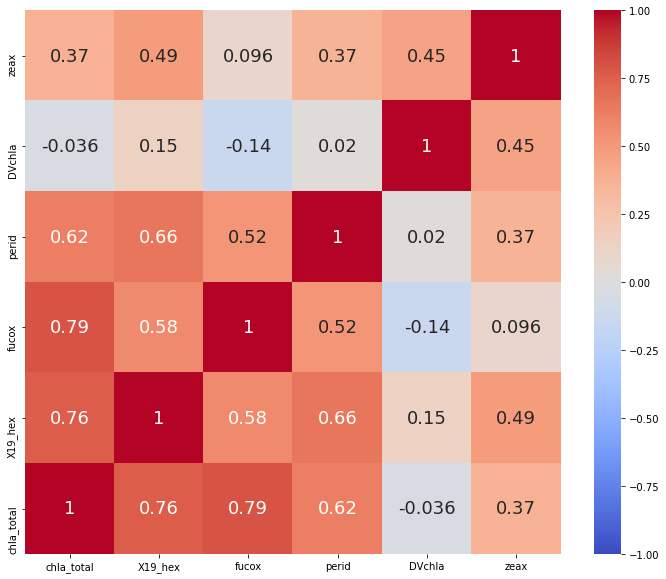

In [ ]:
fig=plt.figure(figsize=(12,10))
sn.heatmap(corr_df_concat, annot=True, annot_kws={"fontsize":18}, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
data.columns

Index(['combined_station', 'total_chla_5.0', 'total_chla_13.92',
       'total_chla_23.23', 'total_chla_38.75', 'total_chla_64.63',
       'total_chla_107.81', 'total_chla_179.85', 'DVchla_5.0', 'DVchla_13.92',
       'DVchla_23.23', 'DVchla_38.75', 'DVchla_64.63', 'DVchla_107.81',
       'DVchla_179.85', 'X19hex_5.0', 'X19hex_13.92', 'X19hex_23.23',
       'X19hex_38.75', 'X19hex_64.63', 'X19hex_107.81', 'X19hex_179.85',
       'fucox_5.0', 'fucox_13.92', 'fucox_23.23', 'fucox_38.75', 'fucox_64.63',
       'fucox_107.81', 'fucox_179.85', 'perid_5.0', 'perid_13.92',
       'perid_23.23', 'perid_38.75', 'perid_64.63', 'perid_107.81',
       'perid_179.85', 'zeax_5.0', 'zeax_13.92', 'zeax_23.23', 'zeax_38.75',
       'zeax_64.63', 'zeax_107.81', 'zeax_179.85', 'long_sat', 'lat_sat',
       'chla_sat', 'sst', 'RRS490', 'RRS555', 'RRS443', 'RRS412', 'KD490',
       'KDPAR', 'PAR', 'ZEU', 'ZHL', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df_sat=data[['chla_sat','RRS412', 'RRS443', 'RRS490','RRS555', 'sst', 'KD490', 'KDPAR', 'PAR', 'ZEU', 'ZHL']]

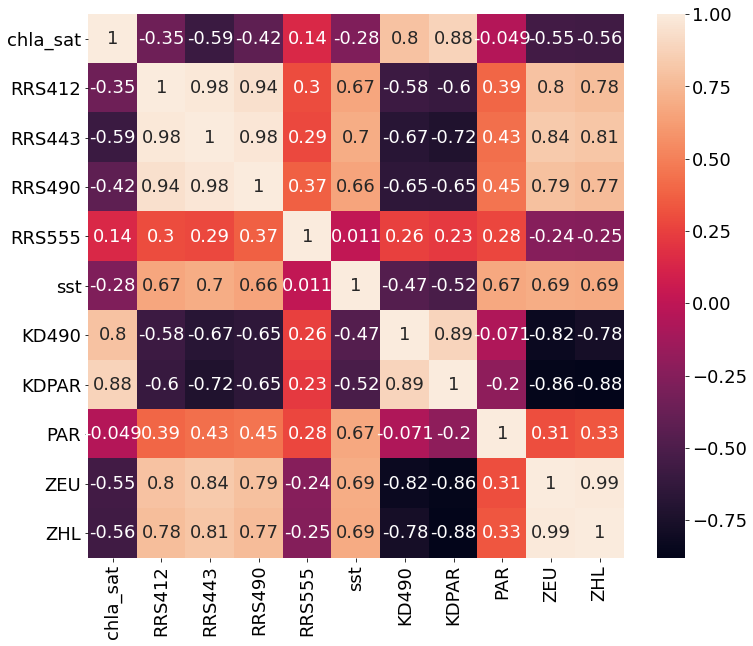

In [ ]:
fig=plt.figure(figsize=(12,10))
corr_df_sat=df_sat.corr()
sn.heatmap(corr_df_sat, annot=True)
plt.show()

Corrélations cohérentes avec celles trouvées pour le monde entier.

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
     | 149.1MB 460kB/s
     |████████████████████████████████| 6.5MB 5.4MB/s 
     |████████████████████████████████| 225kB 39.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759568 sha256=2f28b33e402b44565c1d3c8ead5d5537b4cb5e7e56651025f1e8db639683f296
  Stored in directory: /tmp/pip-ephem-wheel-cache-9q2le_no/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl 

     |████████████████████████████████| 2.8MB 4.5MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702420 sha256=949181180c33661261e228e822c74aa0530ee4b6e5c84c9d826300369981ad10
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.1
    Uninstalling pyproj-3.0.1:
      Successfully uninstalled pyproj-3.0.1


In [ ]:
data.columns

Index(['combined_station', 'total_chla_5.0', 'total_chla_13.92',
       'total_chla_23.23', 'total_chla_38.75', 'total_chla_64.63',
       'total_chla_107.81', 'total_chla_179.85', 'DVchla_5.0', 'DVchla_13.92',
       'DVchla_23.23', 'DVchla_38.75', 'DVchla_64.63', 'DVchla_107.81',
       'DVchla_179.85', 'X19hex_5.0', 'X19hex_13.92', 'X19hex_23.23',
       'X19hex_38.75', 'X19hex_64.63', 'X19hex_107.81', 'X19hex_179.85',
       'fucox_5.0', 'fucox_13.92', 'fucox_23.23', 'fucox_38.75', 'fucox_64.63',
       'fucox_107.81', 'fucox_179.85', 'perid_5.0', 'perid_13.92',
       'perid_23.23', 'perid_38.75', 'perid_64.63', 'perid_107.81',
       'perid_179.85', 'zeax_5.0', 'zeax_13.92', 'zeax_23.23', 'zeax_38.75',
       'zeax_64.63', 'zeax_107.81', 'zeax_179.85', 'long_sat', 'lat_sat',
       'chla_sat', 'sst', 'RRS490', 'RRS555', 'RRS443', 'RRS412', 'KD490',
       'KDPAR', 'PAR', 'ZEU', 'ZHL', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [ ]:
data['lat_sat'].min()

32.2872

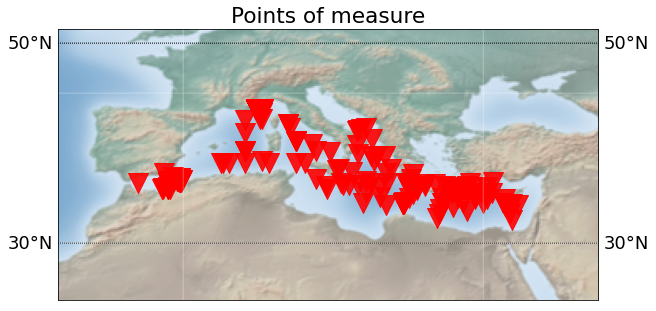

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
m = Basemap(projection='cyl',llcrnrlon=data['long_sat'].min()-8,llcrnrlat=data['lat_sat'].min()-8,
              urcrnrlon=data['long_sat'].max()+8,urcrnrlat=data['lat_sat'].max()+8,
              ax=ax,resolution ='l',area_thresh=1000.)
# m.drawcoastlines(linewidth=0.25)
# m.drawcountries(linewidth=0.25)
# m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
# y,x = map(lon, lat)
plt.scatter(data['long_sat'],data['lat_sat'],c= 'red',marker='v',alpha=0.9,s=400)


draw_map(m)
plt.title('Points of measure')
plt.show()

###Corrélations entre les pigments après complétion


In [ ]:
fichier="/content/drive/MyDrive/projet_long/completed_med.csv"
data = pd.read_csv(fichier,sep=";")
data.head()

,total_chla_5_0,total_chla_13_92,total_chla_23_23,total_chla_38_75,total_chla_64_63,total_chla_107_81,total_chla_179_85,DVchla_5_0,DVchla_13_92,DVchla_23_23,...,perid_64_63,perid_107_81,perid_179_85,zeax_5_0,zeax_13_92,zeax_23_23,zeax_38_75,zeax_64_63,zeax_107_81,zeax_179_85
0,0.30900,0.48300,0.87500,1.15500,0.71800,0.75700,0.04700,0.00000,0.00000,0.00000,...,0.02400,0.0180,0.0,0.00300,0.00500,0.01100,0.01050,0.00700,0.01067,0.00000
1,0.15600,0.15700,0.06500,0.26750,0.41500,0.21900,0.02550,0.00000,0.00000,0.00000,...,0.02550,0.0040,0.0,0.03900,0.04900,0.02000,0.04750,0.02000,0.00367,0.00050
2,0.09472,0.08489,0.08560,0.24183,0.29462,0.02910,0.00864,0.00648,0.00687,0.00704,...,0.00189,0.0000,0.0,0.04304,0.03730,0.03877,0.05342,0.01934,0.00000,0.00000
3,0.09657,0.08721,0.13969,0.21097,0.30578,0.02291,0.00622,0.01217,0.00198,0.01680,...,0.00281,0.0000,0.0,0.04974,0.04051,0.05318,0.04783,0.02308,0.00000,0.00000
4,0.32600,0.34200,0.33600,0.32200,0.09450,0.05150,0.14167,0.00000,0.00000,0.00000,...,0.00150,0.0005,0.0,0.01917,0.01955,0.02576,0.01042,0.00550,0.00335,0.00353


In [ ]:
comp_chla_concat=pd.concat([data['total_chla_5_0'],data['total_chla_13_92'],data['total_chla_23_23'],data['total_chla_38_75'],data['total_chla_64_63'],data['total_chla_107_81'],data['total_chla_179_85']])

In [ ]:
pd.DataFrame(comp_chla_concat)
comp_chla_concat=comp_chla_concat.reset_index()
comp_chla_concat=comp_chla_concat.drop(columns='index')

In [ ]:
comp_DVchla_concat=pd.concat([data['DVchla_5_0'],data['DVchla_13_92'],data['DVchla_23_23'],data['DVchla_38_75'],data['DVchla_64_63'],data['DVchla_107_81'],data['DVchla_179_85']])

In [ ]:
pd.DataFrame(comp_DVchla_concat)
comp_DVchla_concat=comp_DVchla_concat.reset_index()
comp_DVchla_concat=comp_DVchla_concat.drop(columns='index')

In [ ]:
comp_X19hex_concat=pd.concat([data['X19hex_5_0'],data['X19hex_13_92'],data['X19hex_23_23'],data['X19hex_38_75'],data['X19hex_64_63'],data['X19hex_107_81'],data['X19hex_179_85']])

In [ ]:
pd.DataFrame(comp_X19hex_concat)
comp_X19hex_concat=comp_X19hex_concat.reset_index()
comp_X19hex_concat=comp_X19hex_concat.drop(columns='index')

In [ ]:
comp_fucox_concat=pd.concat([data['fucox_5_0'],data['fucox_13_92'],data['fucox_23_23'],data['fucox_38_75'],data['fucox_64_63'],data['fucox_107_81'],data['fucox_179_85']])

In [ ]:
pd.DataFrame(comp_fucox_concat)
comp_fucox_concat=comp_fucox_concat.reset_index()
comp_fucox_concat=comp_fucox_concat.drop(columns='index')

In [ ]:
comp_perid_concat=pd.concat([data['perid_5_0'],data['perid_13_92'],data['perid_23_23'],data['perid_38_75'],data['perid_64_63'],data['perid_107_81'],data['perid_179_85']])

In [ ]:
pd.DataFrame(comp_perid_concat)
comp_perid_concat=comp_perid_concat.reset_index()
comp_perid_concat=comp_perid_concat.drop(columns='index')

In [ ]:
comp_zeax_concat=pd.concat([data['zeax_5_0'],data['zeax_13_92'],data['zeax_23_23'],data['zeax_38_75'],data['zeax_64_63'],data['zeax_107_81'],data['zeax_179_85']])

In [ ]:
pd.DataFrame(comp_zeax_concat)
comp_zeax_concat=comp_zeax_concat.reset_index()
comp_zeax_concat=comp_zeax_concat.drop(columns='index')

In [ ]:
df_concat=pd.concat([comp_chla_concat,comp_X19hex_concat,comp_fucox_concat,comp_perid_concat,comp_DVchla_concat,comp_zeax_concat],axis=1)

In [ ]:
df_concat.columns = ['chla_total', 'X19_hex','fucox','perid', 'DVchla', 'zeax']

In [ ]:
df_concat

,chla_total,X19_hex,fucox,perid,DVchla,zeax
0,0.30900,0.07000,0.18500,0.019,0.00000,0.00300
1,0.15600,0.03300,0.01200,0.004,0.00000,0.03900
2,0.09472,0.02077,0.00541,0.000,0.00648,0.04304
3,0.09657,0.01041,0.00342,0.000,0.01217,0.04974
4,0.32600,0.05000,0.02900,0.000,0.00000,0.01917
...,...,...,...,...,...,...
5084,0.03933,0.00567,0.01467,0.000,0.00000,0.00000
5085,0.01300,0.00367,0.00433,0.000,0.00000,0.00000
5086,0.00000,0.00000,0.00000,0.000,0.00000,0.00000
5087,0.01500,0.00600,0.00300,0.000,0.00000,0.00000


In [ ]:
corr_df_concat=df_concat.corr()

In [ ]:
corr_df_concat=corr_df_concat.reindex(['zeax', 'DVchla', 'perid', 'fucox','X19_hex','chla_total'])
corr_df_concat

,chla_total,X19_hex,fucox,perid,DVchla,zeax
zeax,0.39554,0.52197,0.12119,0.39634,0.45397,1.00000
DVchla,-0.01866,0.11525,-0.15193,0.01475,1.00000,0.45397
perid,0.66741,0.70484,0.58327,1.00000,0.01475,0.39634
fucox,0.79947,0.62169,1.00000,0.58327,-0.15193,0.12119
X19_hex,0.78115,1.00000,0.62169,0.70484,0.11525,0.52197
chla_total,1.00000,0.78115,0.79947,0.66741,-0.01866,0.39554


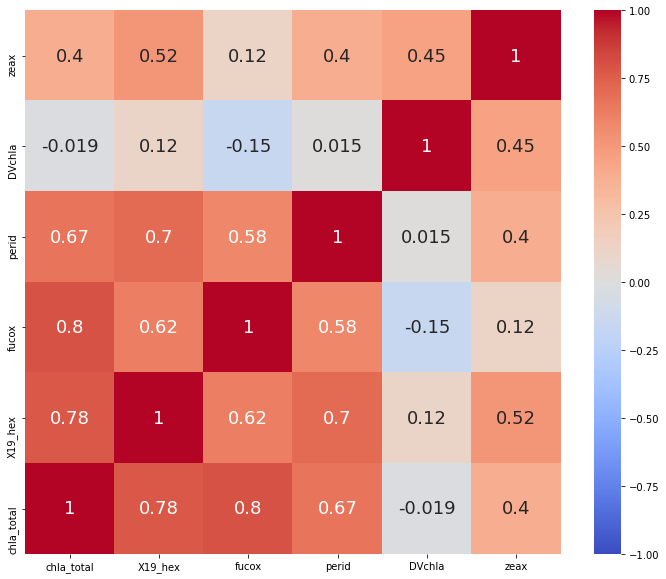

In [ ]:
fig=plt.figure(figsize=(12,10))
sn.heatmap(corr_df_concat, annot=True, annot_kws={"fontsize":18}, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [ ]:
comp_concat=pd.concat([comp_chla_concat,comp_DVchla_concat,comp_X19hex_concat,comp_fucox_concat,comp_perid_concat,comp_zeax_concat],axis=1)

In [ ]:
comp_concat.columns = ['chla_total', 'DVchla', 'X19_hex','fucox','perid','zeax']

In [ ]:
comp_concat

,chla_total,DVchla,X19_hex,fucox,perid,zeax
0,0.30900,0.00000,0.07000,0.18500,0.019,0.00300
1,0.15600,0.00000,0.03300,0.01200,0.004,0.03900
2,0.09472,0.00648,0.02077,0.00541,0.000,0.04304
3,0.09657,0.01217,0.01041,0.00342,0.000,0.04974
4,0.32600,0.00000,0.05000,0.02900,0.000,0.01917
...,...,...,...,...,...,...
5084,0.03933,0.00000,0.00567,0.01467,0.000,0.00000
5085,0.01300,0.00000,0.00367,0.00433,0.000,0.00000
5086,0.00000,0.00000,0.00000,0.00000,0.000,0.00000
5087,0.01500,0.00000,0.00600,0.00300,0.000,0.00000


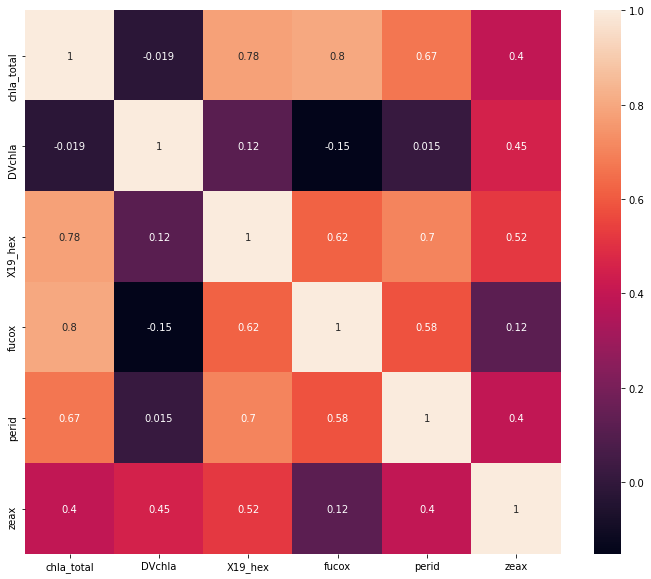

In [ ]:
fig=plt.figure(figsize=(12,10))
corr_comp_concat=comp_concat.corr()
sn.heatmap(corr_comp_concat, annot=True)
plt.show()